In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.impute import SimpleImputer

import dabl

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

# Step 1 : Load Data into dataset

In [2]:
df = pd.read_csv("D:/Revi/Programs/Conda/TMLC/Projects/RTA Dataset.csv")

# Step 2 : Exploratory Data Analysis

### Step 2a : Let's check how many rows and columns does this dataframe have

As per the output the data has 12316 rows and 32 columns. One of these columns in the target.
Target : The column that needs to be predicted. In this dataset we want to predict the severity of the accident. Therefore the column Accident_severity is the target column.

In [3]:
df.shape

(12316, 32)

### Step 2b : Let's understand the data type of the columns. 

In [4]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

Here we have many Categorical (Object) data types including the target (Accident_severity).

### Step 2c : Let's review the data to understand more.

* What values are in the columns?
* Are there missing values?
* What are the possible list of values in each column?

In [5]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9881,17:21:00,Thursday,31-50,Male,Junior high school,Employee,NaN,Other,Governmental,Unknown,...,NaN,Passenger,Female,5,3,Driver,NaN,Not a Pedestrian,No distancing,Slight Injury
233,20:15:00,Tuesday,18-30,Unknown,High school,Employee,2-5yr,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
12163,17:35:00,Saturday,Over 51,Male,NaN,NaN,NaN,Other,Owner,5-10yrs,...,Going straight,na,na,na,na,Employee,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
10445,8:55:00,Thursday,Over 51,Male,NaN,NaN,NaN,Long lorry,Owner,NaN,...,Other,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
7526,17:25:00,Wednesday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


Some observations are as follows

* Day_of_week has possible 7 values (Monday to Sunday)
* Sex_of_driver is either Male or Female
* Educational level is Elementary, Junior, High or Above high school
* Service Year information is missing for most of the rows.
* Casualty related fields are also missing information in some of the rows.


Let's review the missing values in detail

In [6]:
df.isnull()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
12312,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
12313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().any()

Time                           False
Day_of_week                    False
Age_band_of_driver             False
Sex_of_driver                  False
Educational_level               True
Vehicle_driver_relation         True
Driving_experience              True
Type_of_vehicle                 True
Owner_of_vehicle                True
Service_year_of_vehicle         True
Defect_of_vehicle               True
Area_accident_occured           True
Lanes_or_Medians                True
Road_allignment                 True
Types_of_Junction               True
Road_surface_type               True
Road_surface_conditions        False
Light_conditions               False
Weather_conditions             False
Type_of_collision               True
Number_of_vehicles_involved    False
Number_of_casualties           False
Vehicle_movement                True
Casualty_class                 False
Sex_of_casualty                False
Age_band_of_casualty           False
Casualty_severity              False
W

In [8]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Most of the columns have missing values. Some of the columns have missing values as high as 30%

Next question to ask is does our data have duplicate values

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

This seems to be cleaned dataset as we could not see any duplicate rows.

In [10]:
df.duplicated().sum()

0

### Step 2c : Statistical Analysis

In [11]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [12]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this step the statistical parameters against each of the columns are analyzed. For example the values of mean, median and mode are looked at to see how skewed the data is. It also provides a view of range of values in a column, unique values and most frequently occuring values.

#### Exploring the data using visualizations

Each of the columns are called "Features". The objective of this visualization is to explore the distribution or the composition of each of the features visually.

First let's convert the time column from string to datetime data so that the components of time field can be extracted separately. This is useful to analyze the data from time perspective.

In [13]:
# Converting time to DateTime
df["Time"] = pd.to_datetime(df["Time"])

In [14]:
# Extracting hour and minute from timestamp
df["Hour"] = df["Time"].dt.hour
df["Minute"] = df["Time"].dt.minute
df.drop("Time",axis=1, inplace=True)

In [15]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6


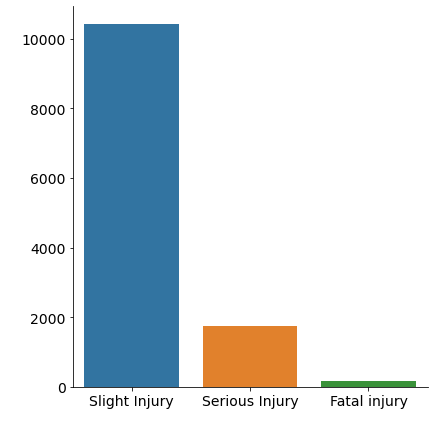

In [16]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

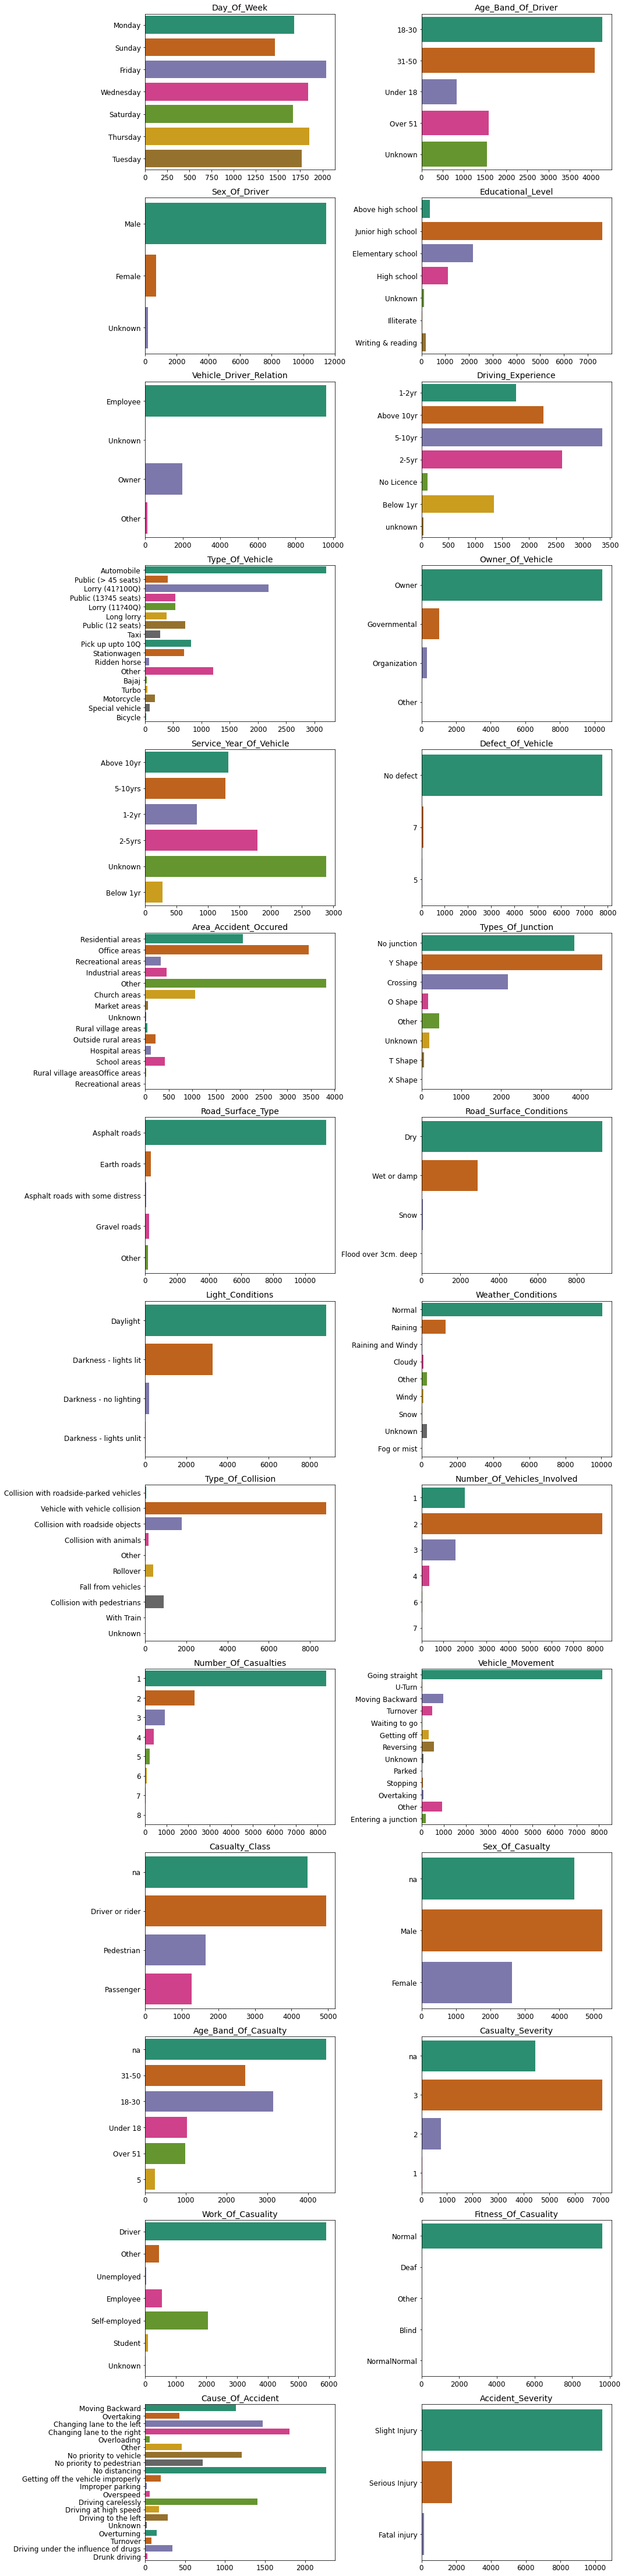

In [17]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['Hour', 'Minute', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

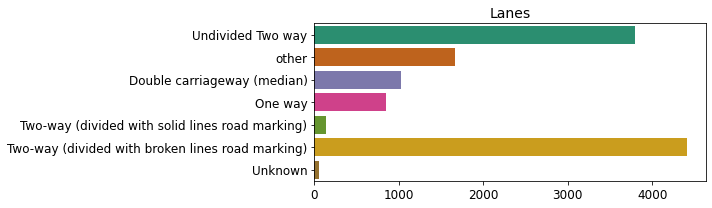

In [18]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Lanes_or_Medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

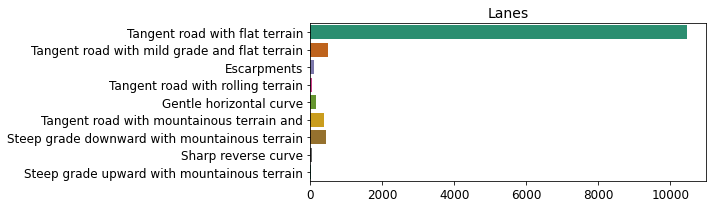

In [19]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

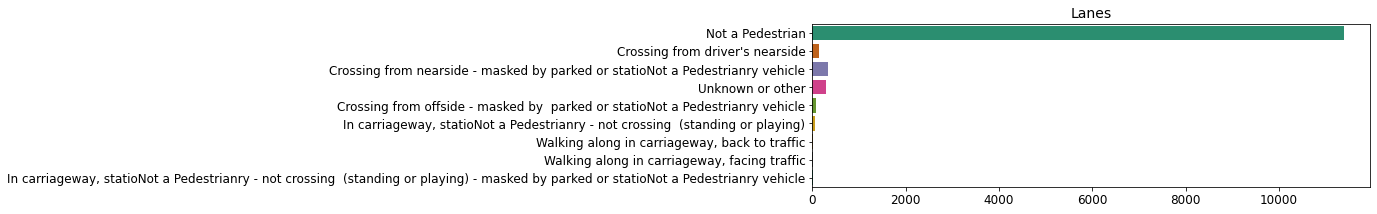

In [20]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

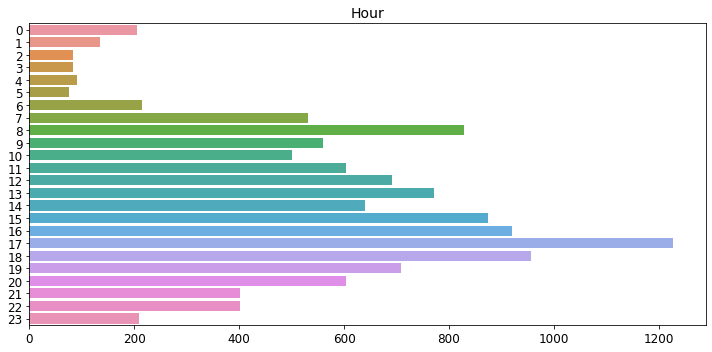

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

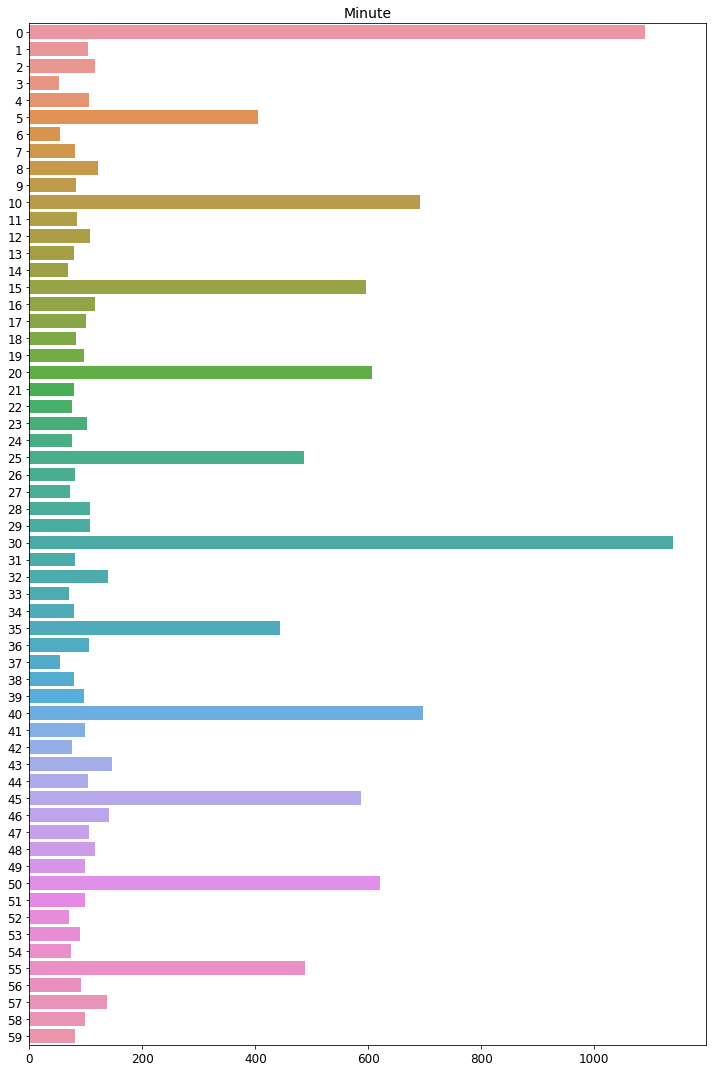

In [22]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='Minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

 Key observations in the data are as follows
 
 Most of the accidents involved
 
 * Two vehicles
 * Occured on Fridays
 * Between 3pm to 6pm with maximum numbers at 5 pm
 
 Most of the drivers are
 
     * male and 18-30 yrs age group
     * have only studied upto Junior high school
     * have 5 to 10 years of driving experience
 
 Most of the vehicles involved in accident are
 * Personally Owned Passenger vehicles
 
 Most Accidents happened on
  
 * two-way lanes
 * tangent road with flat terrains
 * Y shaped junctions
 * asphalt roads
 * day time
 * Normal weather conditions
 
 Casualities
 
 * happened to physically fit male drivers
 * are of severity 3
 
 Accident trend is such that
 
 * vehicle to vehicle collision
 * straight movement
 * no pedestrian accidents
 
 Causes are
 
 * Not keeping enough distance

In [23]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [24]:
df['Minute'] = df['Minute'].apply(lambda x: convert_minutes(x))

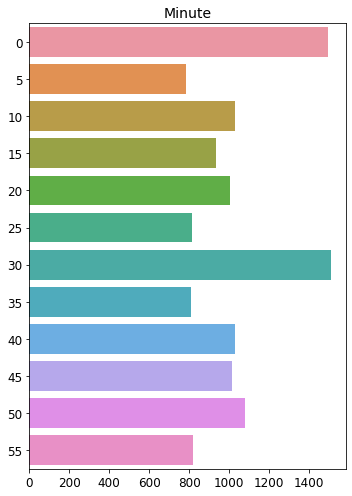

In [25]:
plt.figure(figsize=(5,7))
sns.countplot(data=df, y='Minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [26]:
#Identify numberical and categorical columns

num_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.dtypes[df.dtypes != 'int64'].index.tolist()
df[cat_cols]

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# Step 3 : Preprocessing

In [27]:
#Dropping columns that have maximum missing values
df = df.drop(["Service_year_of_vehicle","Defect_of_vehicle","Work_of_casuality","Fitness_of_casuality"],axis=1)

In [28]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
print(impute_cols)

['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement']


In [29]:
#Impute the columns with missing values. Strategy to fill the missing values is to use the most frequently occuring values.
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
imputer = SimpleImputer(strategy="most_frequent",missing_values=np.nan)

for col in impute_cols:
    imputer = imputer.fit(df[[col]])
    df[col] = imputer.transform(df[[col]])

In [30]:
#Check if there are any more missing values
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
Hour                           0
Minute                         0
dtype: int64

In [31]:
X = df.drop(["Accident_severity"],axis=1)
y = df["Accident_severity"]

In [32]:
#Split data into train and test sets
np.random.seed(42)

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [34]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

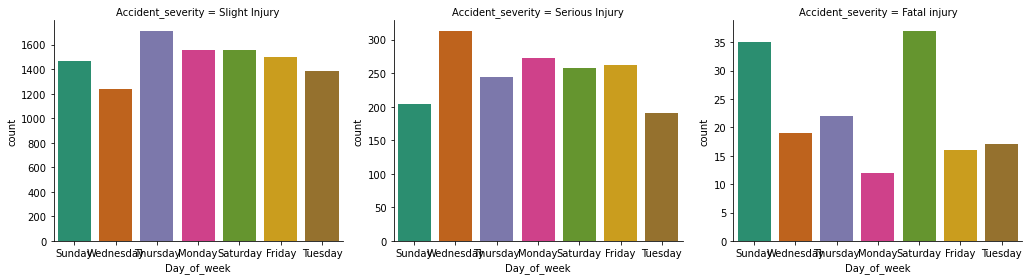

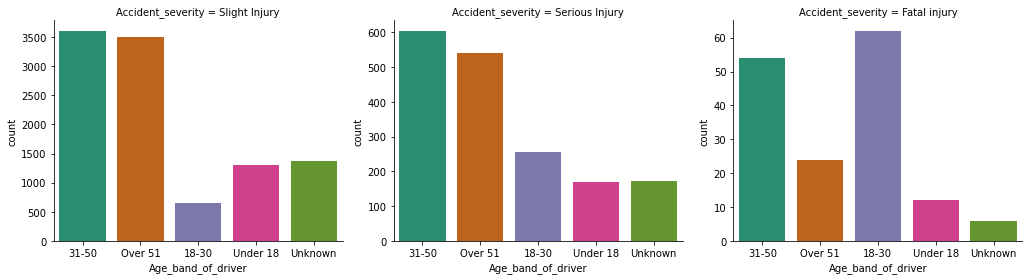

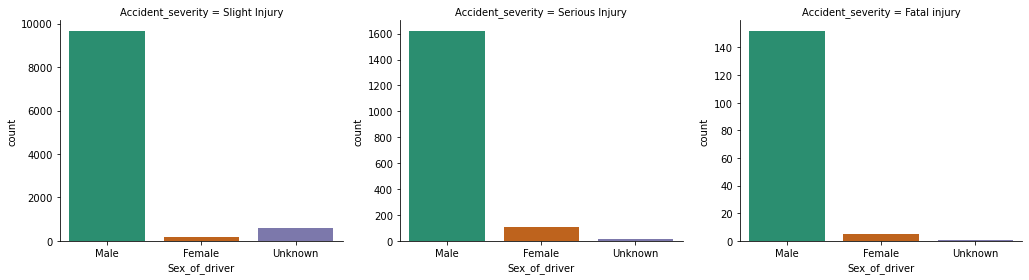

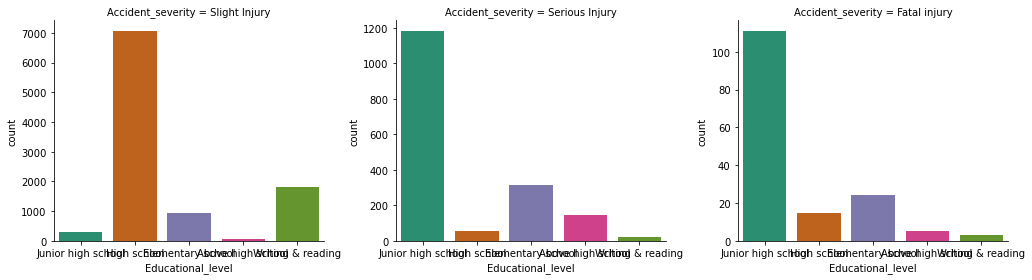

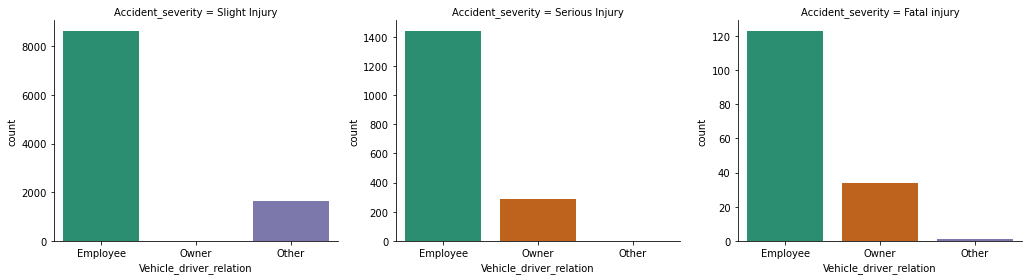

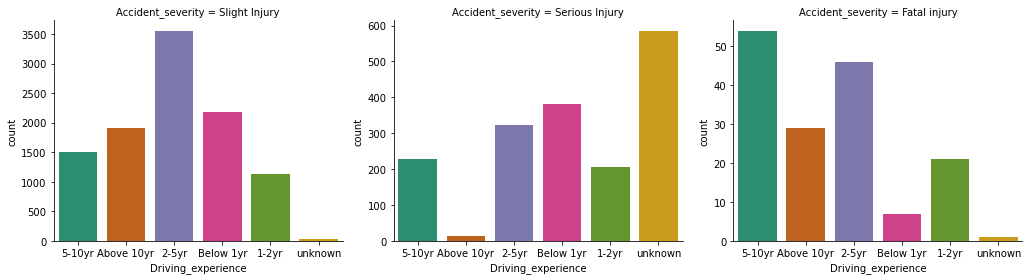

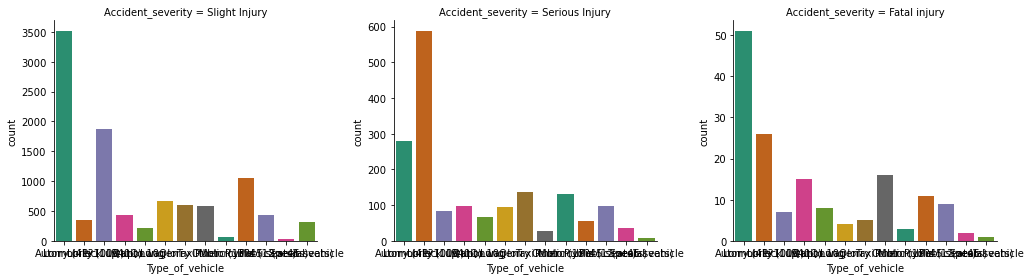

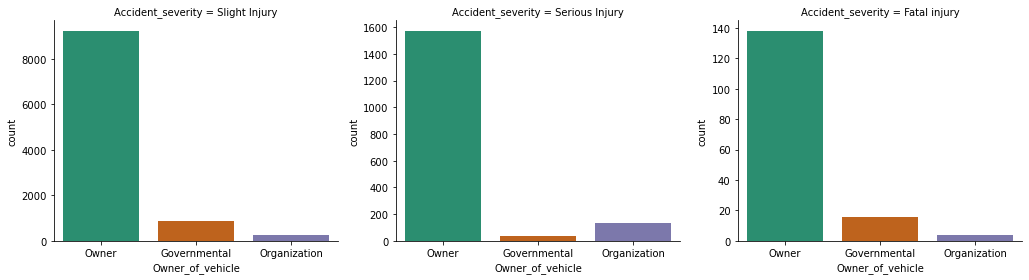

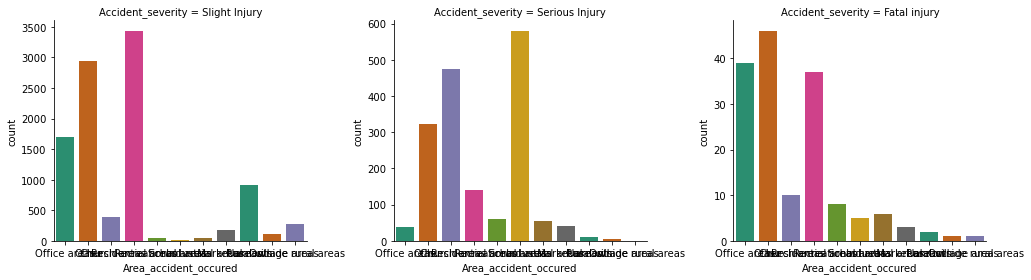

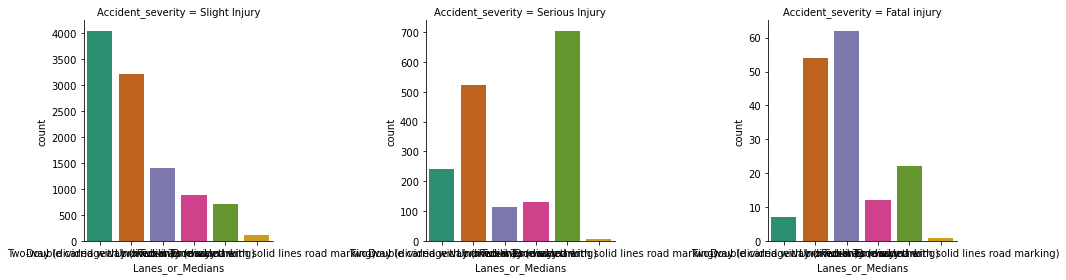

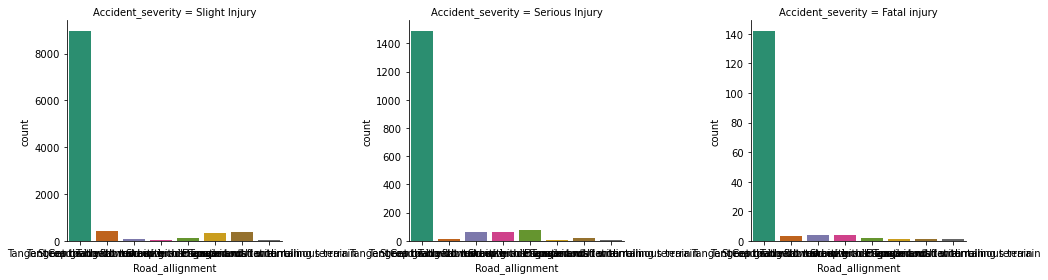

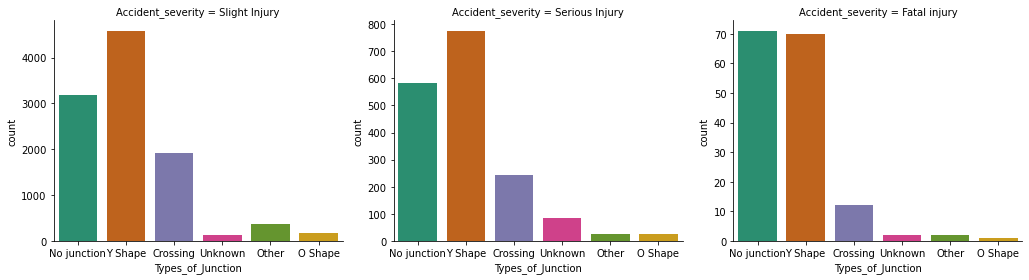

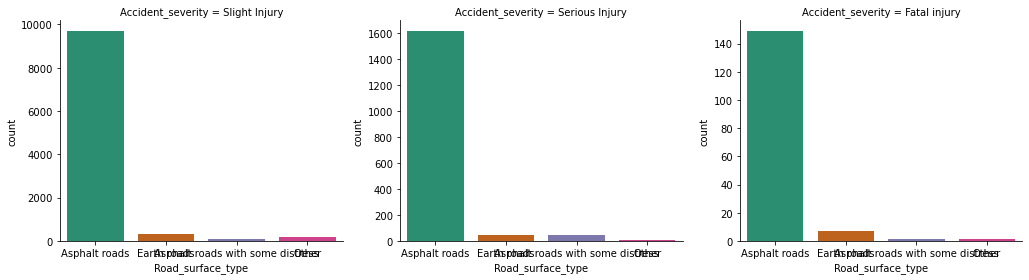

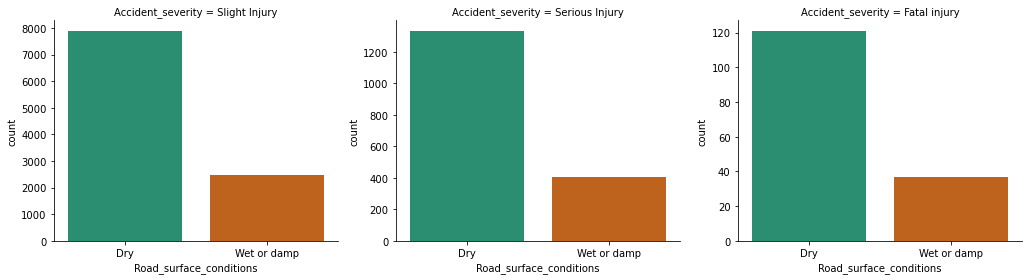

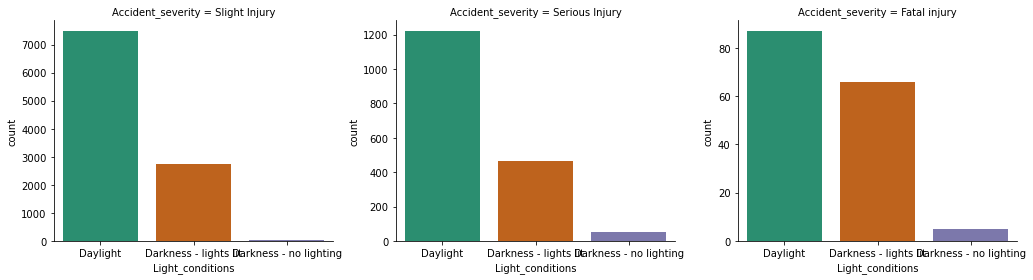

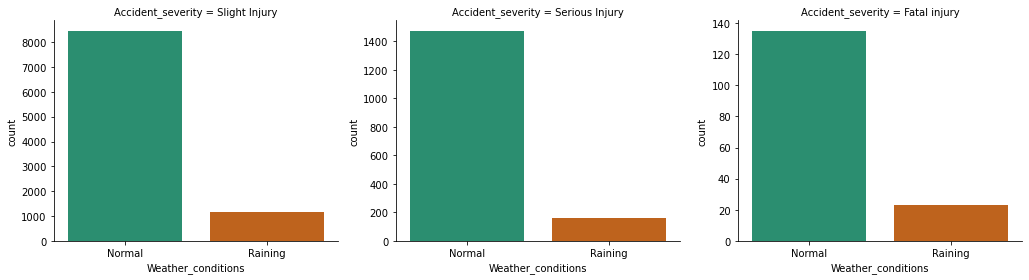

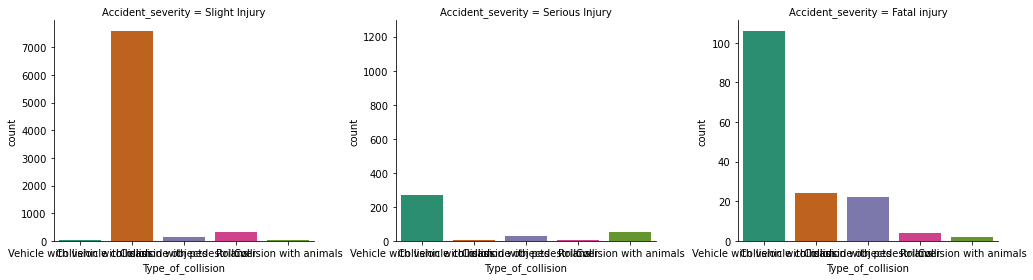

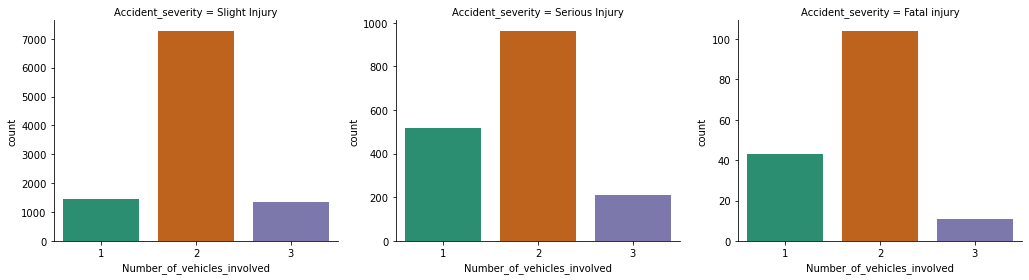

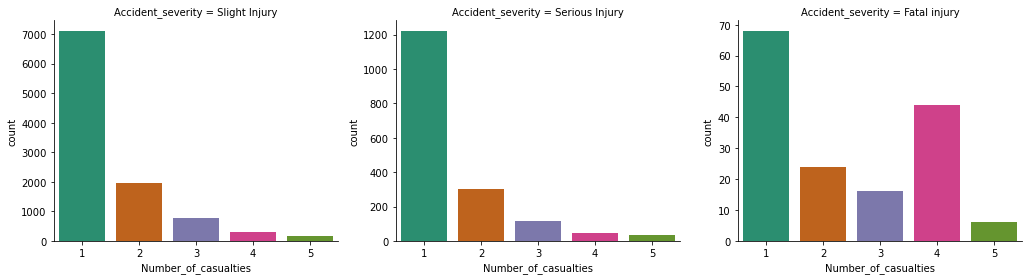

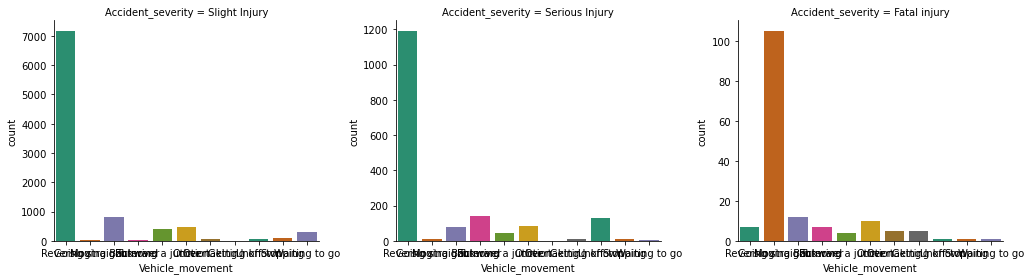

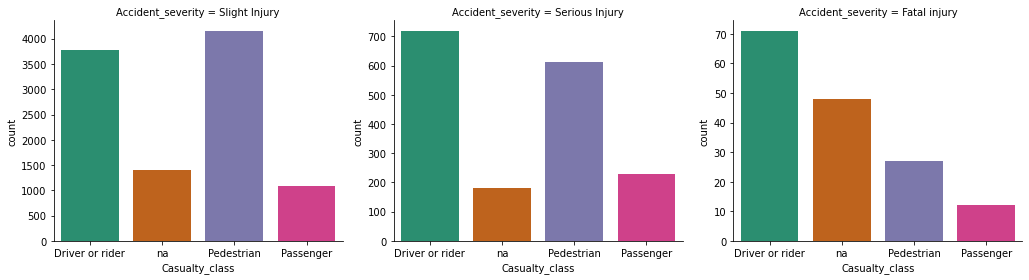

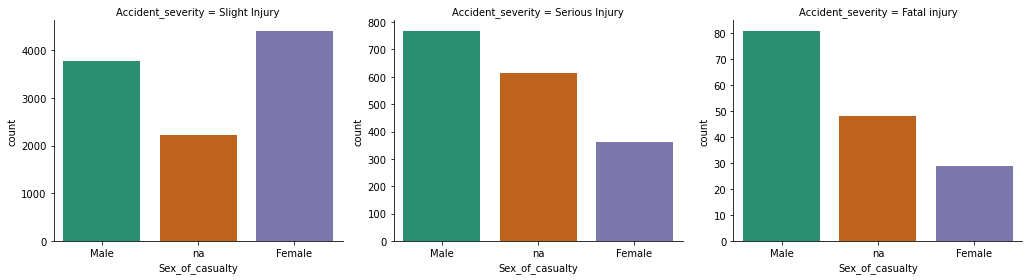

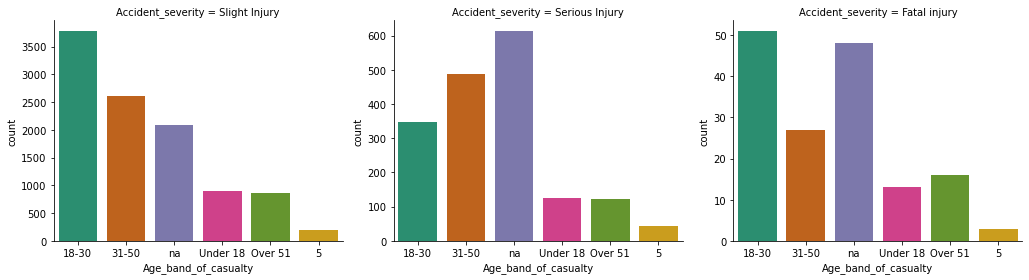

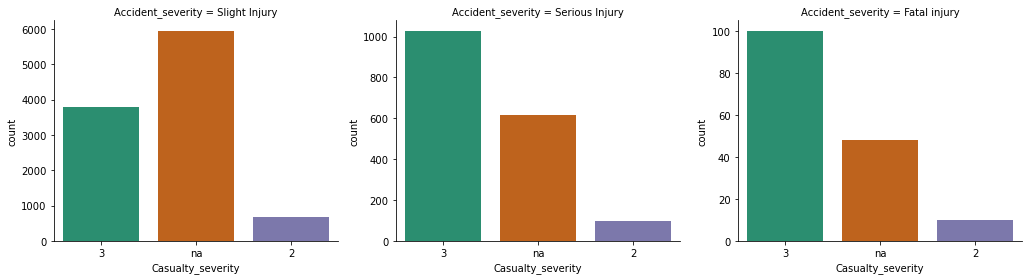

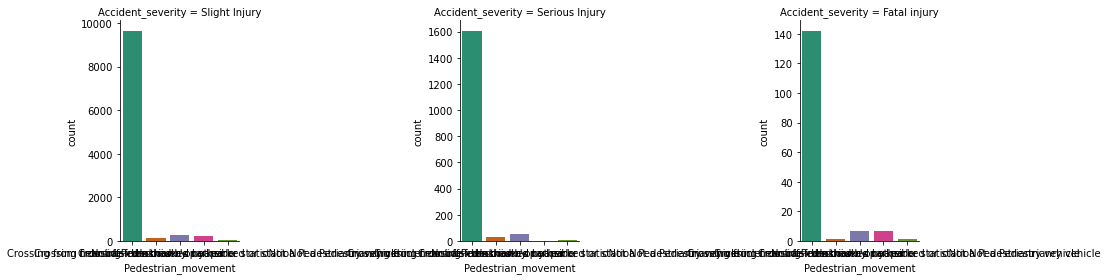

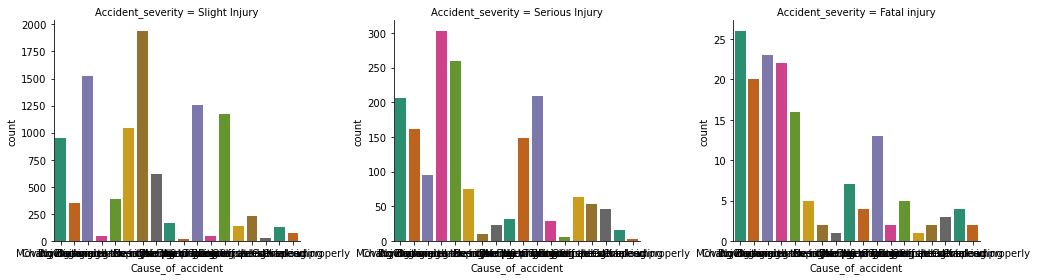

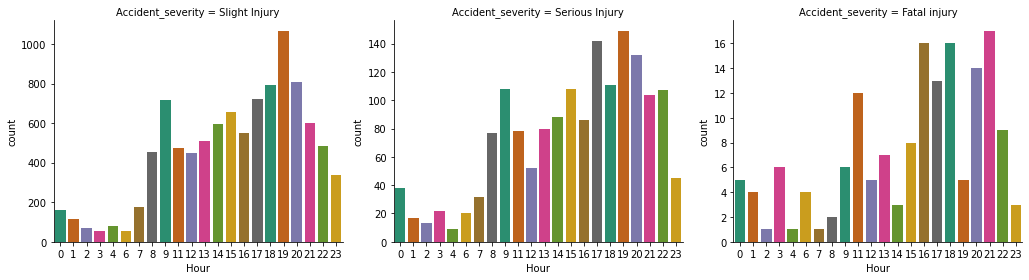

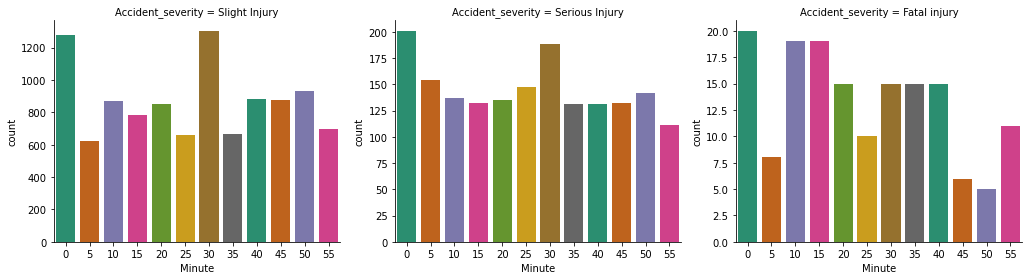

In [35]:
for col in X:
    g = sns.FacetGrid(df, col='Accident_severity', size=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

In [36]:
#!pip install imblearn

In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [37]:
# upsampling using smote to have equal distribution of data across all target classes.

counter = Counter(y_train_enc)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train_enc)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train_enc, y_train_enc = oversample.fit_resample(X_train_enc, y_train_enc)

counter = Counter(y_train_enc)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train_enc)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train_enc.shape, y_train_enc.shape)

Class= 2, n=8351 (84.76%)
Class= 1, n=1380 (14.01%)
Class= 0, n=121 (1.23%)
Class= 2, n=8351 (33.33%)
Class= 1, n=8351 (33.33%)
Class= 0, n=8351 (33.33%)
Upsampled data shape:  (25053, 28) (25053,)


# 4. Model

In [38]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn Machine Learning Models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [39]:
model_scores = fit_and_score(models=models,X_train=X_train_enc,X_test=X_test_enc,y_train=y_train_enc,y_test=y_test_enc)
model_scores

{'Logistic Regression': 0.442775974025974,
 'KNN': 0.47483766233766234,
 'Random Forest': 0.8429383116883117}

The above scores are recieved eliminating the upsampling step. We are getting higher scores without upsampling and hence keeping the data with original distribution

### 4.1 Model Comparison

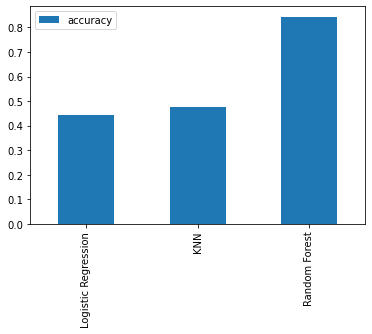

In [40]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [41]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors

neighbors = range(1,21)

# Setup KNN Instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train_enc,y_train_enc)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train_enc,y_train_enc))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test_enc,y_test_enc))

In [42]:
train_scores

[1.0,
 0.8943839061190276,
 0.9140222727817028,
 0.8550672574142817,
 0.8707540015167844,
 0.8290424300482976,
 0.8437312896659083,
 0.8110805093202411,
 0.8226559693449886,
 0.7976689418432922,
 0.8067696483455076,
 0.7865325509918972,
 0.7947152037680119,
 0.7775515906278689,
 0.7841376282281564,
 0.7690096994371931,
 0.7746776833113799,
 0.7609867081786612,
 0.7652177383946034,
 0.753762024508043]

Maximum KNN score on the test data : 61.36%


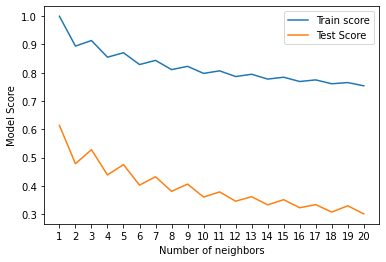

In [43]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

### 4.1 Hyperparameter Tuning with GridSearchCV

In [44]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver" : ["liblinear"]}

#scorer = make_scorer(f1_score, average = 'weighted')
                                   
# Setup grid hyperparameters search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train_enc,y_train_enc);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [45]:
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [46]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test_enc,y_test_enc)

0.4484577922077922

In [52]:
# Let's repeat this process without upsampling. 
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [53]:
model_scores = fit_and_score(models=models,X_train=X_train_enc,X_test=X_test_enc,y_train=y_train_enc,y_test=y_test_enc)
model_scores

{'Logistic Regression': 0.8376623376623377,
 'KNN': 0.8222402597402597,
 'Random Forest': 0.8421266233766234}

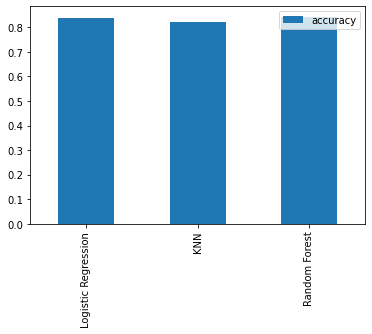

In [54]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [55]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors

neighbors = range(1,21)

# Setup KNN Instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train_enc,y_train_enc)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train_enc,y_train_enc))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test_enc,y_test_enc))

In [56]:
train_scores

[1.0,
 0.8765732846122615,
 0.8718026796589525,
 0.8616524563540398,
 0.858607389362566,
 0.8558668290702396,
 0.8507917174177831,
 0.8514007308160779,
 0.8486601705237515,
 0.8481526593585059,
 0.847442143727162,
 0.8472391392610638,
 0.8471376370280146,
 0.8473406414941129,
 0.847442143727162,
 0.8472391392610638,
 0.8476451481932602,
 0.8476451481932602,
 0.8477466504263094,
 0.8477466504263094]

Maximum KNN score on the test data : 83.77%


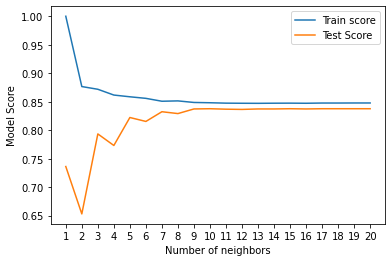

In [57]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

In [62]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver" : ["liblinear"]}

#scorer = make_scorer(f1_score, average = 'weighted')
                                   
# Setup grid hyperparameters search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train_enc,y_train_enc);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [63]:
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [64]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test_enc,y_test_enc)

0.8376623376623377

# 5. Test Model Performance

In [65]:
y_pred = gs_log_reg.predict(X_test_enc)

In [66]:
#!pip install plotly

In [67]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [68]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [69]:
model_performance(gs_log_reg,y_test_enc, y_pred)

D:\Revi\Programs\Conda\TMLC\env\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [76]:
model_tuned = LogisticRegression(C=0.0001,solver='liblinear')
model_tuned.fit(X_train_enc, y_train_enc)
y_pred_tuned = model_tuned.predict(X_test_enc)

In [92]:
y_pred_tuned

array([2, 2, 2, ..., 2, 2, 2])

In [98]:
print(classification_report(y_test_enc, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464



# 6. Explainable AI

In [70]:
#!pip install shap

In [71]:
import shap

In [72]:
shap.initjs()

In [73]:
X_sample_enc = X_train_enc[0:5,:]
X_sample_enc

array([[ 4.,  4.,  1.,  1.,  0.,  4., 10.,  3.,  6.,  0.,  5.,  1.,  0.,
         0.,  3.,  2.,  1.,  2.,  3.,  2.,  3.,  2.,  5.,  3.,  5.,  0.,
        17.,  4.],
       [ 4.,  0.,  1.,  4.,  2.,  2.,  0.,  3., 13.,  6.,  5.,  7.,  0.,
         3.,  0.,  4.,  8.,  2.,  0.,  2.,  0.,  1.,  0.,  2.,  5., 12.,
        19.,  9.],
       [ 0.,  1.,  1.,  2.,  0.,  0.,  9.,  0.,  2.,  2.,  5.,  7.,  0.,
         0.,  3.,  2.,  8.,  2.,  2.,  2.,  3.,  2.,  5.,  3.,  5.,  3.,
        20.,  2.],
       [ 5.,  1.,  1.,  4.,  2.,  2.,  0.,  3.,  6.,  6.,  5.,  7.,  0.,
         0.,  3.,  2.,  8.,  1.,  0.,  2.,  1.,  0.,  0.,  2.,  5., 10.,
        13.,  2.],
       [ 4.,  4.,  0.,  4.,  0.,  1.,  0.,  3.,  6.,  6.,  5.,  7.,  0.,
         3.,  3.,  2.,  2.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  5.,  5.,
        15., 10.]])

In [77]:
explainer = shap.LinearExplainer(model_tuned, X_sample_enc, feature_perturbation="interventional")

In [86]:
model_tuned.feature_names = list(X.columns.values)

In [87]:
coeff = pd.DataFrame(model_tuned.coef_,columns=model_tuned.feature_names)
coeff.T

,0,1,2
Day_of_week,-0.025145,-0.017581,0.015063
Age_band_of_driver,-0.015713,-0.008725,0.010952
Sex_of_driver,-0.009306,-0.008804,0.008268
Educational_level,-0.031368,-0.020989,0.020279
Vehicle_driver_relation,-0.002440,-0.001575,0.000504
Driving_experience,-0.021383,-0.010419,0.011772
Type_of_vehicle,-0.034999,-0.012736,0.010828
Owner_of_vehicle,-0.027193,-0.014708,0.014490
Area_accident_occured,-0.055703,-0.019045,0.016222
Lanes_or_Medians,-0.026488,-0.009833,0.008009


In [88]:
shap_values = explainer.shap_values(X_test_enc)

In [93]:
shap_values

[array([[ 0.08549305, -0.        , -0.00186118, ...,  0.27624139,
          0.21317818, -0.02997642],
        [ 0.01005801, -0.01571293, -0.00186118, ...,  0.13812069,
          0.06090805,  0.26978781],
        [-0.06537704,  0.03142587, -0.00186118, ..., -0.18416093,
          0.06090805,  0.26978781],
        ...,
        [ 0.03520302, -0.        , -0.00186118, ..., -0.23020116,
          0.21317818, -0.22981925],
        [-0.04023202,  0.03142587, -0.00186118, ..., -0.18416093,
          0.82225869, -0.17985854],
        [-0.04023202,  0.03142587, -0.00186118, ..., -0.13812069,
         -0.24363221,  0.11990569]]),
 array([[ 0.05977608, -0.        , -0.00176071, ...,  0.10389022,
          0.05219808, -0.01576527],
        [ 0.00703248, -0.00872501, -0.00176071, ...,  0.05194511,
          0.01491374,  0.14188742],
        [-0.04571112,  0.01745001, -0.00176071, ..., -0.06926015,
          0.01491374,  0.14188742],
        ...,
        [ 0.02461368, -0.        , -0.00176071, ..., -

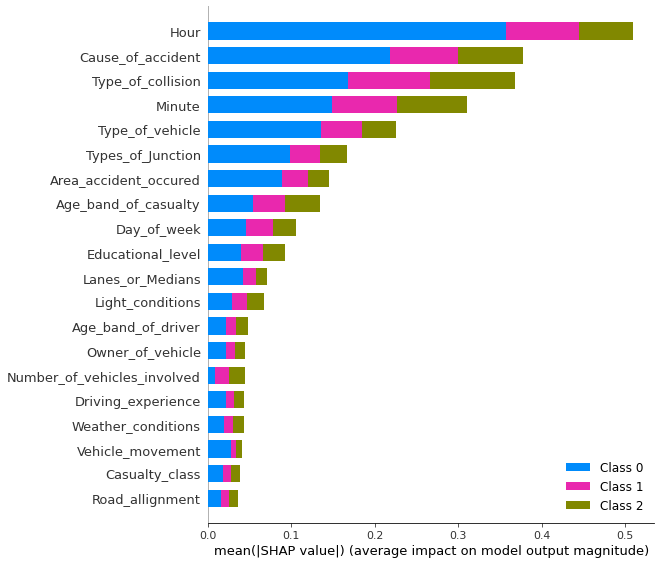

In [90]:
shap.summary_plot(shap_values, X_test_enc, feature_names=model_tuned.feature_names)

In [94]:
# prediction class 2, shap values for class 2
shap.force_plot(explainer.expected_value[2], shap_values[2][2], X_test_enc[2], feature_names=model_tuned.feature_names)

In [95]:
# prediction class 1, shap values for class 1
shap.force_plot(explainer.expected_value[1], shap_values[1][1], X_test_enc[1], feature_names=model_tuned.feature_names)

In [96]:
# prediction class 0, shap values for class 0
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_enc[0], feature_names=model_tuned.feature_names)

# Saving the Model

In [99]:
import joblib

In [101]:
with open('ld_tuned_final.joblib', 'wb') as f:
    joblib.dump(model_tuned, f, compress=1)